# Final evaluation 
This notebook takes a closer look into the final model as well as an overview of all the models experimented with during this project and outside models.

In [1]:
# packages for data handling
import numpy as np
import pandas as pd
from sklearn import svm, ensemble, tree
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import torch

# packages for plotting
import seaborn as sns
import matplotlib.pyplot as plt

# utilities packages
from ipynb.fs.full.Functions import load_model, model_eval, load_train_test_data

import warnings
warnings.filterwarnings('ignore')

<div style="border-bottom: 3px solid black; margin-bottom:5px"></div>
<div style="border-bottom: 3px solid black"></div>

## 1) Loading model and Dataset

As shown in the fine_tuning notebook, the best models were the SVM/SVC and the random forest with no oversample, therefore those will be the ones further analysed here.
However the other ones will also be loaded to be used as comparison.

In [2]:
X_train, X_test, y_train, y_test = load_train_test_data()

A snippet of our training data:


,Age,PhysicallyActive,BMI,Sleep,SoundSleep,JunkFood,Stress,BPLevel,Pregnancies,UrinationFreq,BMI_high,highBP_yes,RegularMedicine_yes,Pdiabetes_yes,Alcohol_yes,Gender_Male,Smoking_yes,Family_Diabetes_yes
188,3.0,0.0,-0.514087,-0.775318,-0.293345,0.0,1.0,2.0,-0.416387,0.0,0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
145,0.0,2.0,-1.261602,0.026431,-0.293345,0.0,0.0,1.0,-0.416387,0.0,0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
87,3.0,1.0,-2.009116,-2.378816,-0.838128,0.0,2.0,2.0,-0.416387,1.0,0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
262,3.0,2.0,-0.887844,0.828180,-0.838128,0.0,1.0,1.0,-0.416387,1.0,0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
45,1.0,1.0,-0.887844,-0.775318,0.251438,0.0,1.0,0.0,-0.416387,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


There are 232 entries with 18 columns in our training data.
There are 41 entries with 18 columns in our testing data.


In [3]:
svm = load_model(svm.SVC(),scoring='f1_macro')
forest = load_model(ensemble.RandomForestClassifier(),scoring='f1_macro')
LR = load_model(LogisticRegression(random_state=0),scoring='f1_macro')
XGB = load_model(xgb.XGBClassifier(seed=0),scoring='f1_macro')
tree = load_model(tree.DecisionTreeClassifier(random_state=0),scoring='f1_macro', ros='ros')

[16:34:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:553: 
  If you are loading a serialized model (like pickle in Python, RDS in R) generated by
  older XGBoost, please export the model by calling `Booster.save_model` from that version
  first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/latest/tutorials/saving_model.html

  for more details about differences between saving model and serializing.



<div style="border-bottom: 3px solid black"></div>

### 1.2) Adding predictions to dataset

In [4]:
y1_predicted_train = svm.predict(X_train)
y1_predicted_test = svm.predict(X_test)

y2_predicted_train = forest.predict(X_train)
y2_predicted_test = forest.predict(X_test)


In [5]:
X_train['target'] = y_train
X_train['prediction_svm'] = y1_predicted_train
X_train['prediction_forest'] = y2_predicted_train
X_train['set'] = 'train'


X_test['target'] = y_test
X_test['prediction_svm'] = y1_predicted_test
X_test['prediction_forest'] = y2_predicted_test
X_test['set'] = 'test'

In [6]:
# merging all data into one dataset
X_full = pd.concat([X_test,X_train])
X_full

,Age,PhysicallyActive,BMI,Sleep,SoundSleep,JunkFood,Stress,BPLevel,Pregnancies,UrinationFreq,...,RegularMedicine_yes,Pdiabetes_yes,Alcohol_yes,Gender_Male,Smoking_yes,Family_Diabetes_yes,target,prediction_svm,prediction_forest,set
202,2.0,2.0,0.420306,0.026431,-0.838128,0.0,1.0,2.0,-0.416387,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1,0,0,test
29,3.0,0.0,-1.448480,-0.775318,0.251438,0.0,1.0,1.0,2.894495,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1,1,1,test
116,0.0,2.0,-0.700966,0.026431,-0.293345,1.0,2.0,1.0,-0.416387,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0,0,0,test
123,0.0,3.0,0.607184,-0.775318,0.251438,1.0,1.0,1.0,1.790868,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,test
160,0.0,3.0,-1.635359,0.828180,-3.017261,0.0,0.0,1.0,-0.416387,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,3.0,0.0,-0.327209,-2.378816,-0.838128,0.0,3.0,2.0,2.894495,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1,1,1,train
154,0.0,2.0,-1.448480,-0.775318,-2.472478,3.0,1.0,1.0,-0.416387,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,train
137,0.0,0.0,-1.074723,1.629930,1.885788,1.0,1.0,1.0,-0.416387,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,train
3,2.0,3.0,-0.514087,0.828180,0.251438,0.0,1.0,1.0,-0.416387,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,train


In [7]:
# reloading data for further analysis
X_train, X_test, y_train, y_test = load_train_test_data()

A snippet of our training data:


,Age,PhysicallyActive,BMI,Sleep,SoundSleep,JunkFood,Stress,BPLevel,Pregnancies,UrinationFreq,BMI_high,highBP_yes,RegularMedicine_yes,Pdiabetes_yes,Alcohol_yes,Gender_Male,Smoking_yes,Family_Diabetes_yes
188,3.0,0.0,-0.514087,-0.775318,-0.293345,0.0,1.0,2.0,-0.416387,0.0,0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
145,0.0,2.0,-1.261602,0.026431,-0.293345,0.0,0.0,1.0,-0.416387,0.0,0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
87,3.0,1.0,-2.009116,-2.378816,-0.838128,0.0,2.0,2.0,-0.416387,1.0,0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
262,3.0,2.0,-0.887844,0.828180,-0.838128,0.0,1.0,1.0,-0.416387,1.0,0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
45,1.0,1.0,-0.887844,-0.775318,0.251438,0.0,1.0,0.0,-0.416387,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


There are 232 entries with 18 columns in our training data.
There are 41 entries with 18 columns in our testing data.


<div style="border-bottom: 3px solid black; margin-bottom:5px"></div>
<div style="border-bottom: 3px solid black"></div>

## 2) Visualizing the results


Evaluation: f1_score
76.07% for the train data
81.48% for the test data

Evaluation: accuracy_score
83.19% for the train data
87.80% for the test data

Evaluation: recall_score
82.67% for the train data
84.62% for the test data

Evaluation: precision_score
70.45% for the train data
78.57% for the test data

Evaluation: confusion_matrix


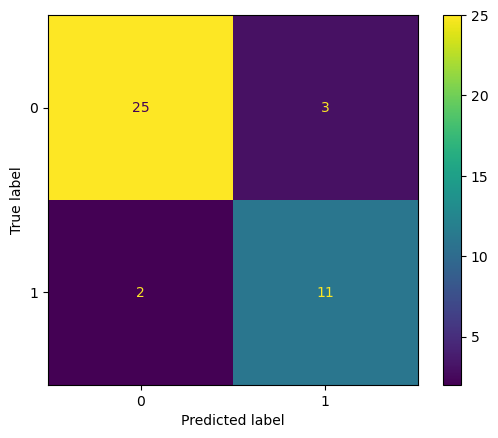

In [8]:
# SVM results
_= model_eval(svm,X_train, X_test, y_train, y_test,confusion=True)

On the SVM's confusion matrix we can see that 5 from the 41 samples in testing was wrongfully predicted, with 3 being false positives and 2 false negatives.


Evaluation: f1_score
82.19% for the train data
75.00% for the test data

Evaluation: accuracy_score
88.79% for the train data
85.37% for the test data

Evaluation: recall_score
80.00% for the train data
69.23% for the test data

Evaluation: precision_score
84.51% for the train data
81.82% for the test data

Evaluation: confusion_matrix


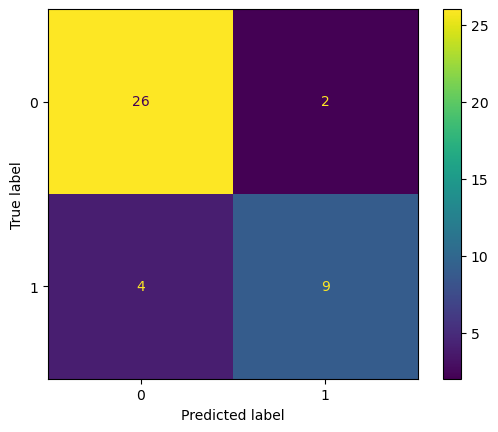

In [9]:
# random forest results
_= model_eval(forest,X_train, X_test, y_train, y_test,confusion=True)

On the Random Forest confusion matrix we can see that 6 from the 41 samples in testing was wrongfully predicted, with 2 being false positives and 4 false negatives.

<div style="border-bottom: 3px solid black"></div>

Looking at how the models compared agains each other during the training round. The observed models are the best variations obtained during the experiments.

In [21]:
def plot_learning_curve(models):
    '''
    This function will plot the learning curve for the given model 
    
    '''
    # import packages needed
    import pandas as pd
    import matplotlib.pyplot as plt
    import numpy as np
    import sklearn
    from sklearn.metrics import f1_score

    
    custom_f1 = f1_score
    custom_f1.__dict__['average'] = 'macro'
    custom_f1.average = 'macro'
    
    # get data
    X_train, X_test, y_train, y_test = load_train_test_data(verbose=False)
    
    
    
    colors = ['green','blue','red','purple','black','yellow']
    steps = 40
    plt.figure(figsize=(10,5))
    for j,model in enumerate(models):
        model_score = []
        for i in np.linspace(.1,1,steps):
            new_model = sklearn.clone(model)
            sample_size = int(len(X_train)*i)
            new_model.fit(X_train.head(sample_size),y_train.head(sample_size))
            pred_test = new_model.predict(X_test)
            model_score.append(custom_f1(y_test,pred_test))
    
        # plotting
        plt.plot(np.linspace(.1,1,steps),model_score, color=colors[j], 
                 linestyle='--',linewidth=1, markersize=1,label=type(model).__name__)
    plt.xlabel('Training size')
    plt.ylabel('F1 score')
    plt.legend()
    plt.title('F1 x Training Size')
    return

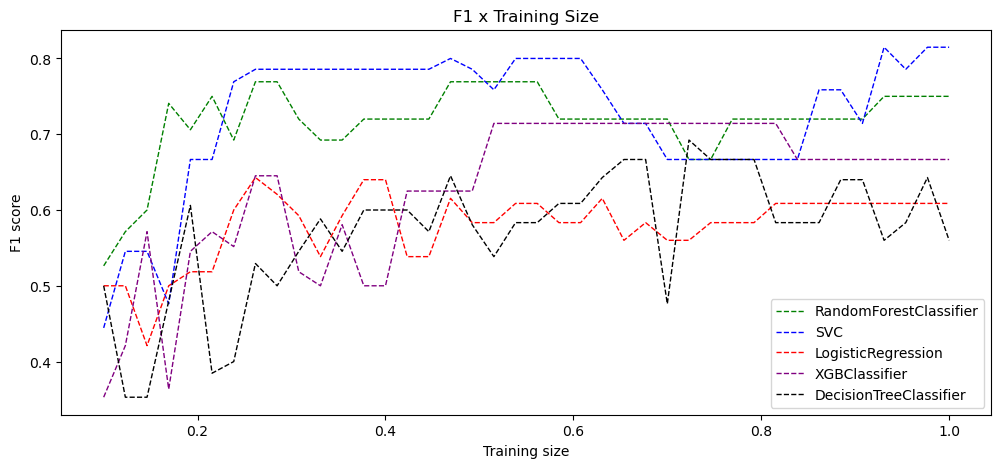

In [22]:
plot_learning_curve([forest,svm,LR,XGB,tree])

<div style="border-bottom: 3px solid black"></div>

One other thing we could do is look at the features importance, but since while using an non-linear svm model the feature lose their meaning we will need to consider only the values for the random forest.

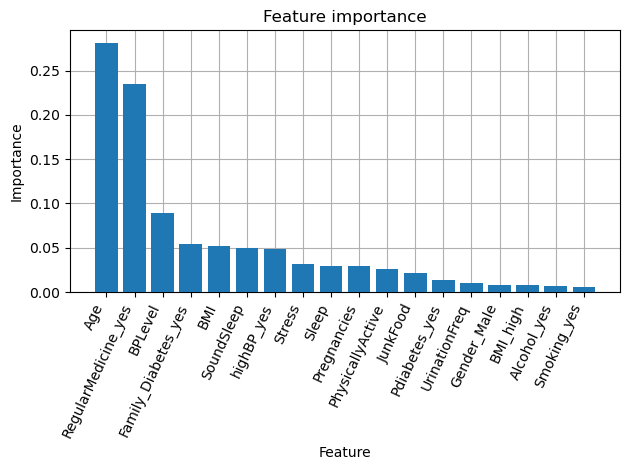

In [12]:
importance = sorted(list(zip(X_train.columns,forest.feature_importances_)), key = lambda x: x[1],reverse=True)
feature,value = [a[0] for a in importance],[a[1] for a in importance]

plt.bar(feature,value, zorder=3)
plt.xticks(rotation=65, ha='right')
plt.xlabel('Feature')
plt.grid()
plt.ylabel('Importance')
plt.title('Feature importance')
plt.tight_layout()
plt.show()

As we can see from the values, the age and the usage of medicine has a deep impact on the model decision, however, the BPLevel is not as high as expected since during the data analysis there was an correlation of 0.4 , almost as high as the RegularMedicine.

<div style="border-bottom: 3px solid black"></div>

Knowing the feature importance, we can also take a closer look at the wrong predictions and see if those were the cases where our models got the prediction wrong

In [13]:
# wrong predictions
wrongs = X_full[(X_full['prediction_svm'] != X_full['target']) | (X_full['prediction_forest'] != X_full['target'])]

In [14]:
# taking a closer look at the missclassifications for the test set
wrongs[wrongs['set']=='test']

,Age,PhysicallyActive,BMI,Sleep,SoundSleep,JunkFood,Stress,BPLevel,Pregnancies,UrinationFreq,...,RegularMedicine_yes,Pdiabetes_yes,Alcohol_yes,Gender_Male,Smoking_yes,Family_Diabetes_yes,target,prediction_svm,prediction_forest,set
202,2.0,2.0,0.420306,0.026431,-0.838128,0.0,1.0,2.0,-0.416387,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1,0,0,test
34,3.0,0.0,0.046549,0.026431,0.796222,0.0,1.0,1.0,2.894495,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,1,1,test
111,2.0,1.0,0.794063,0.026431,-1.927694,1.0,3.0,1.0,-0.416387,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0,1,0,test
196,2.0,3.0,0.233427,0.026431,0.796222,2.0,0.0,1.0,-0.416387,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1,1,0,test
260,3.0,0.0,0.980941,-0.775318,0.251438,0.0,2.0,1.0,-0.416387,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1,1,0,test
132,1.0,0.0,-0.327209,0.828180,1.341005,0.0,1.0,1.0,-0.416387,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1,0,0,test
117,3.0,2.0,-0.887844,0.828180,-0.838128,0.0,1.0,1.0,-0.416387,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0,1,1,test


In [15]:
# taking a closer look at the missclassifications for the test set where the target was 0 and both anwsered 1
wrongs[(wrongs['set']=='test') & (wrongs['prediction_svm']==1)& (wrongs['prediction_forest']==1)]

,Age,PhysicallyActive,BMI,Sleep,SoundSleep,JunkFood,Stress,BPLevel,Pregnancies,UrinationFreq,...,RegularMedicine_yes,Pdiabetes_yes,Alcohol_yes,Gender_Male,Smoking_yes,Family_Diabetes_yes,target,prediction_svm,prediction_forest,set
34,3.0,0.0,0.046549,0.026431,0.796222,0.0,1.0,1.0,2.894495,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,1,1,test
117,3.0,2.0,-0.887844,0.828180,-0.838128,0.0,1.0,1.0,-0.416387,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0,1,1,test


Indeed, these 2 samples had an age on the third group probably causing big impact on the decision.

In [16]:
# taking a closer look at the missclassifications for the test set where the target was 1 and both anwsered 0
wrongs[(wrongs['set']=='test') & (wrongs['prediction_svm']==0)& (wrongs['prediction_forest']==0)]

,Age,PhysicallyActive,BMI,Sleep,SoundSleep,JunkFood,Stress,BPLevel,Pregnancies,UrinationFreq,...,RegularMedicine_yes,Pdiabetes_yes,Alcohol_yes,Gender_Male,Smoking_yes,Family_Diabetes_yes,target,prediction_svm,prediction_forest,set
202,2.0,2.0,0.420306,0.026431,-0.838128,0.0,1.0,2.0,-0.416387,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1,0,0,test
132,1.0,0.0,-0.327209,0.828180,1.341005,0.0,1.0,1.0,-0.416387,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1,0,0,test


On the other side of the coin, these 2 other samples had no regular medicine usage, and the age was not on the 3 group, therefore it was very unlikely for our models to predict 1

These points could be considered outliers, however if not, it is known why the models made those decisions.

<div style="border-bottom: 3px solid black; margin-bottom:5px"></div>
<div style="border-bottom: 3px solid black"></div>

## 3) Comparing models against external work